In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Problem 1 : Predicting SalePrice using GrLivArea
Extract the following Numeric variables from the dataset, and store as two new Pandas DataFrames.

`houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])` Above ground living area in SqFt

`houseSalePrice = pd.DataFrame(houseData['SalePrice'])` Sale Price of house in US Dollars

In [23]:
houseData = pd.read_csv('train.csv')
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseGrLivArea.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [5]:
houseSalePrice = pd.DataFrame(houseData['SalePrice'])
houseSalePrice.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### a) Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.
Remember the correlation coefficient between these two variables from the last Example Class? Check again.

C:\Users\JIanHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Jointplot of GrLivArea against SalePrice')

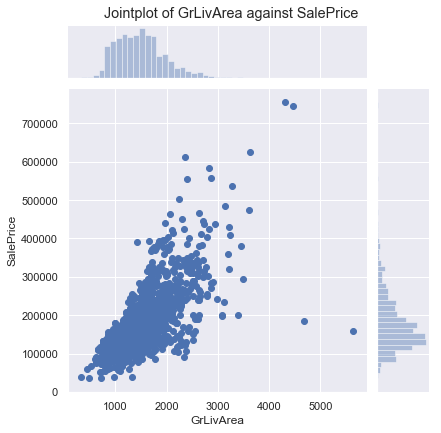

In [233]:
g = sns.jointplot('GrLivArea', 'SalePrice', data = houseData)
g.fig.suptitle('Jointplot of GrLivArea against SalePrice', y=1.0)

In [32]:
pd.concat([houseGrLivArea, houseSalePrice], axis = 1).corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


### b) Import Linear Regression model from Scikit-Learn 
`from sklearn.linear_model import LinearRegression`

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### c) Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.
Train datasets : houseGrLivArea_train and houseSalePrice_train (check both have 1100 rows)

Test datasets : houseGrLivArea_test and houseSalePrice_test (check both have 360 rows)

In [121]:
X = houseGrLivArea
y = houseSalePrice

# qn asks for 360/1460 split instead of a 0.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(360/1460), random_state=42)
print(X_train.size, y_train.size)
print(X_test.size, y_test.size)

1100 1100
360 360


### d) Training : Fit a Linear Regression model with 
`X = houseGrLivArea_train` and `y = houseSalePrice_train`

In [49]:
# X_train and y_train has already been defined
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### e) Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.

y = [[102.45547778]]X + [24767.1412739]


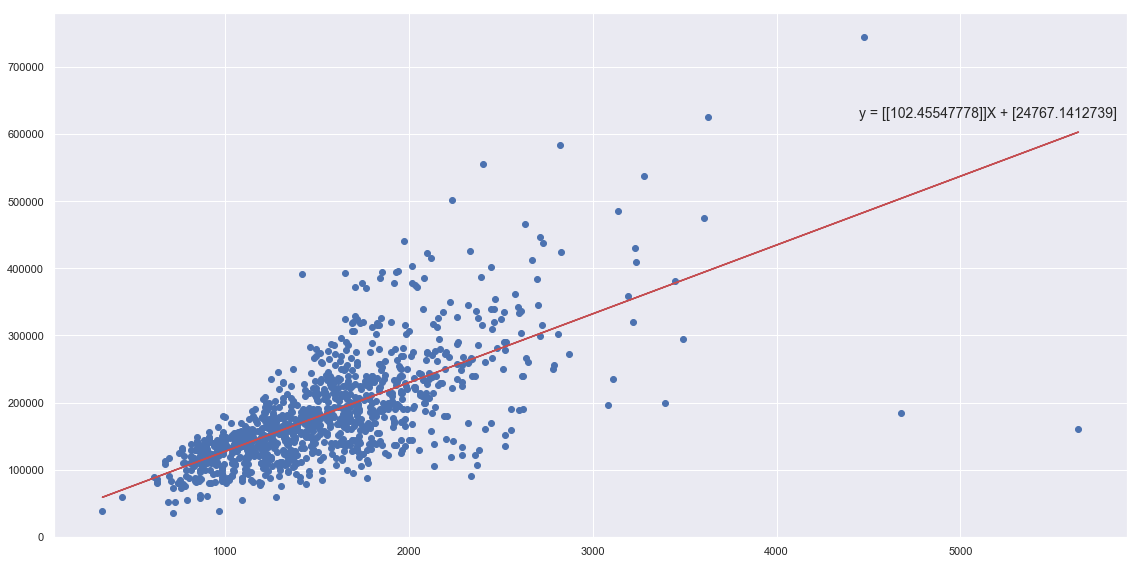

In [76]:
annotation_str = f'y = {linreg.coef_}X + {linreg.intercept_}'
print(annotation_str)

fig, axe = plt.subplots(1,1, figsize = (16,8))
plt.scatter(X_train, y_train)
plt.plot(X_train, linreg.coef_ * X_train + linreg.intercept_, 'r-')
plt.annotate(annotation_str, xy=(0.75, 0.80), xycoords='axes fraction', fontsize = 14)
plt.tight_layout()

### f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.

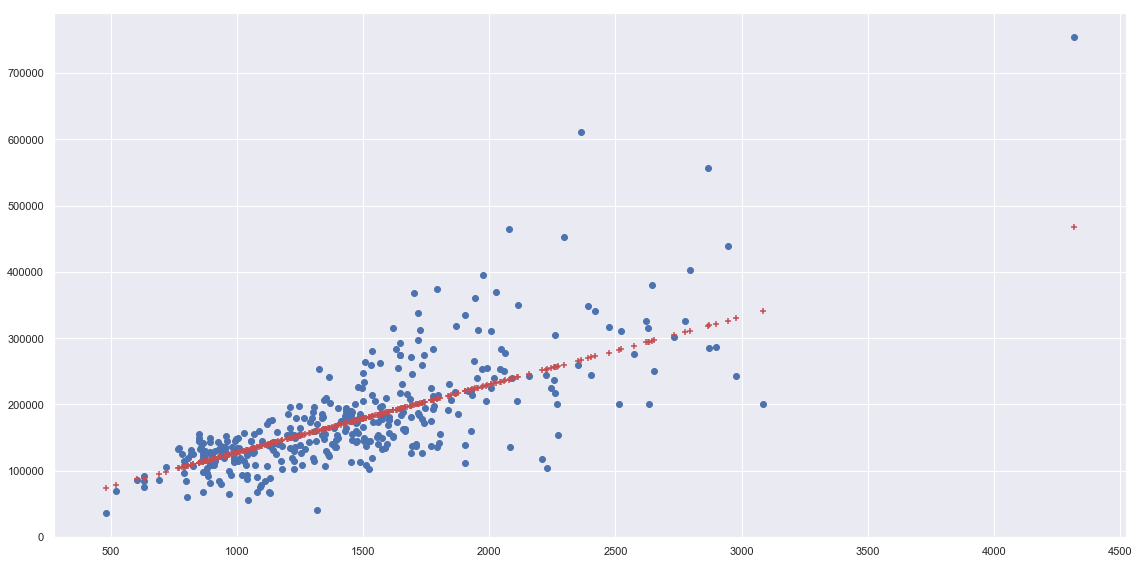

In [99]:
y_predicts = linreg.predict(X_test)

fig, axe = plt.subplots(1,1, figsize = (16,8))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_predicts, c = 'r', marker = '+')
plt.tight_layout()

### g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

In [103]:
print(f'R^2 on Train set:\t{linreg.score(X_train, y_train)}')
print(f'R^2 on Test set:\t{linreg.score(X_test, y_test)}')

R^2 on Train set:	0.48067928962448203
R^2 on Test set:	0.5539262555535382


# Problem 2 : Predicting SalePrice using Other Variables
Perform all the above steps on “SalePrice” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” one by-
one to perform individual Linear Regressions. Discuss with your Friends about the models, compare and contrast the
Explained Variance (R^2), check the predictions, and determine which model is the best to predict “SalePrice”.

In [272]:
def linear_regression(X_col, y_col, df):
    
    # this is needed instead of just using [X_col], [y_col] to make it a single element of the 2D array
    # first bracket initializes the array and the second makes it an element of that array.
    X = df[[X_col]]
    y = df[[y_col]]
    X_name = X.columns[0]
    y_name = y.columns[0]

    g = sns.jointplot(X_name, y_name, data = df)
    g.fig.suptitle(f'Jointplot of {X_name} against {y_name}', y = 1.0) # y gives extra space at top
    
    display(pd.concat([X, y], axis = 1).corr())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(360/1460), random_state=42)
    linreg.fit(X_train, y_train)
    line_eqn = f'y = {linreg.coef_}X + {linreg.intercept_}'
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
    
    ax1.scatter(X_train, y_train)
    ax1.plot(X_train, linreg.coef_ * X_train + linreg.intercept_, 'r-')
    ax1.annotate(line_eqn, xy=(0.55, 0.80), xycoords='axes fraction', fontsize = 14)
    ax1.set_title('Regression Line on train data', fontsize = 14)
    ax1.set_xlabel(X_name)
    ax1.set_ylabel(y_name)
    
    y_predicts = linreg.predict(X_test)
    
    rsquare_train_str = f'$R^2$ on Train Set:\t{linreg.score(X_train, y_train)}'
    rsquare_test_str = f'$R^2$ on Test Set:\t{linreg.score(X_test, y_test)}'
    annotate_str = rsquare_train_str + '\n' + rsquare_test_str
    
    ax2.scatter(X_test, y_test)
    ax2.scatter(X_test, y_predicts, c = 'r', marker = '+')
    ax2.annotate(annotate_str, xy=(0.55, 0.80), xycoords='axes fraction', fontsize = 14)
    ax2.set_title('Predictions on test data', fontsize = 14)
    ax2.set_xlabel(X_name)
    ax2.set_ylabel(y_name)
    
    plt.tight_layout()

C:\Users\JIanHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


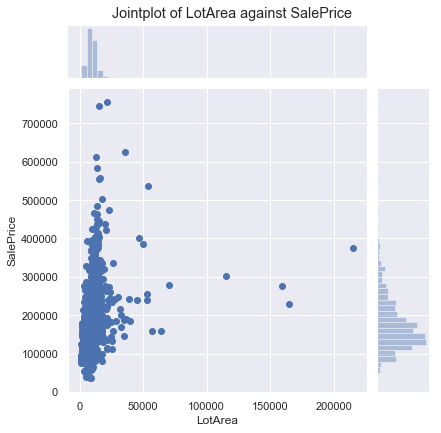

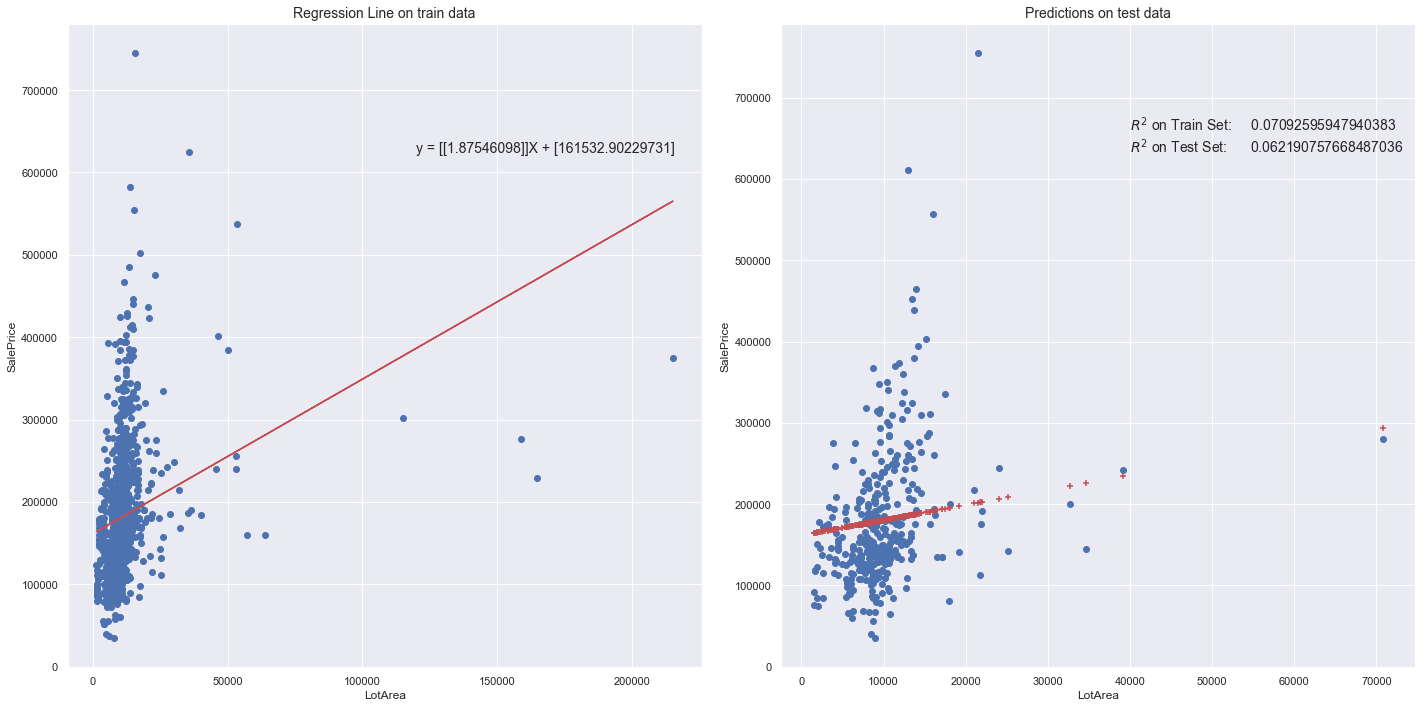

In [273]:
linear_regression('LotArea', 'SalePrice', houseData)

C:\Users\JIanHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


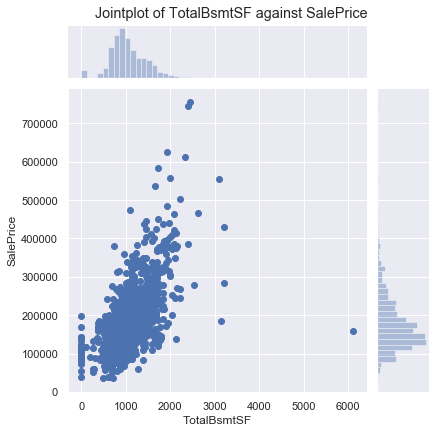

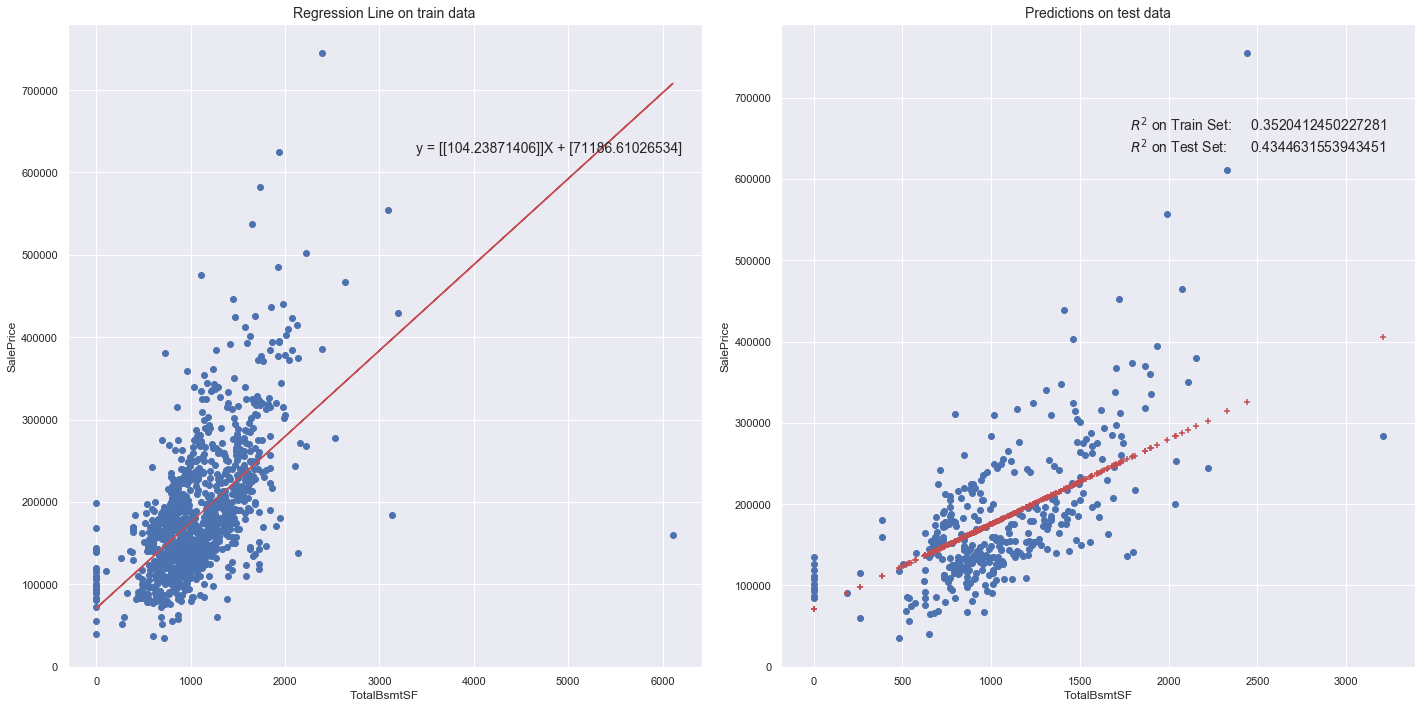

In [274]:
linear_regression('TotalBsmtSF', 'SalePrice', houseData)

C:\Users\JIanHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


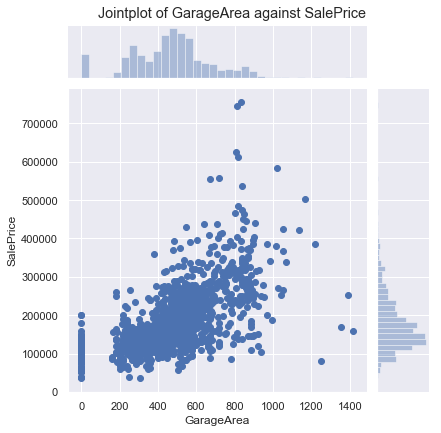

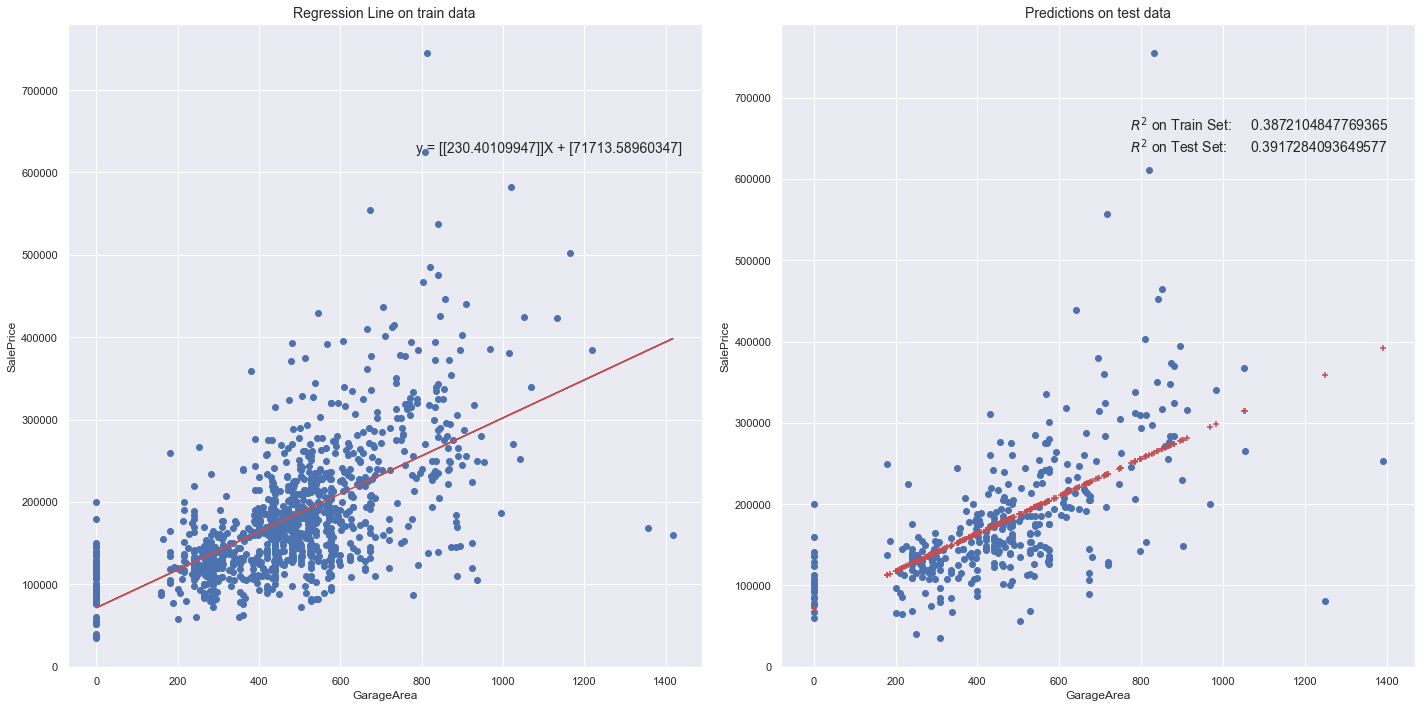

In [275]:
linear_regression('GarageArea', 'SalePrice', houseData)

C:\Users\JIanHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


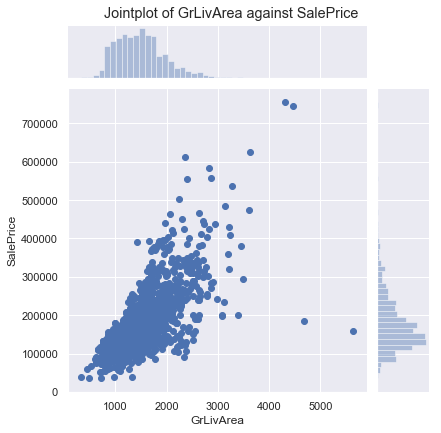

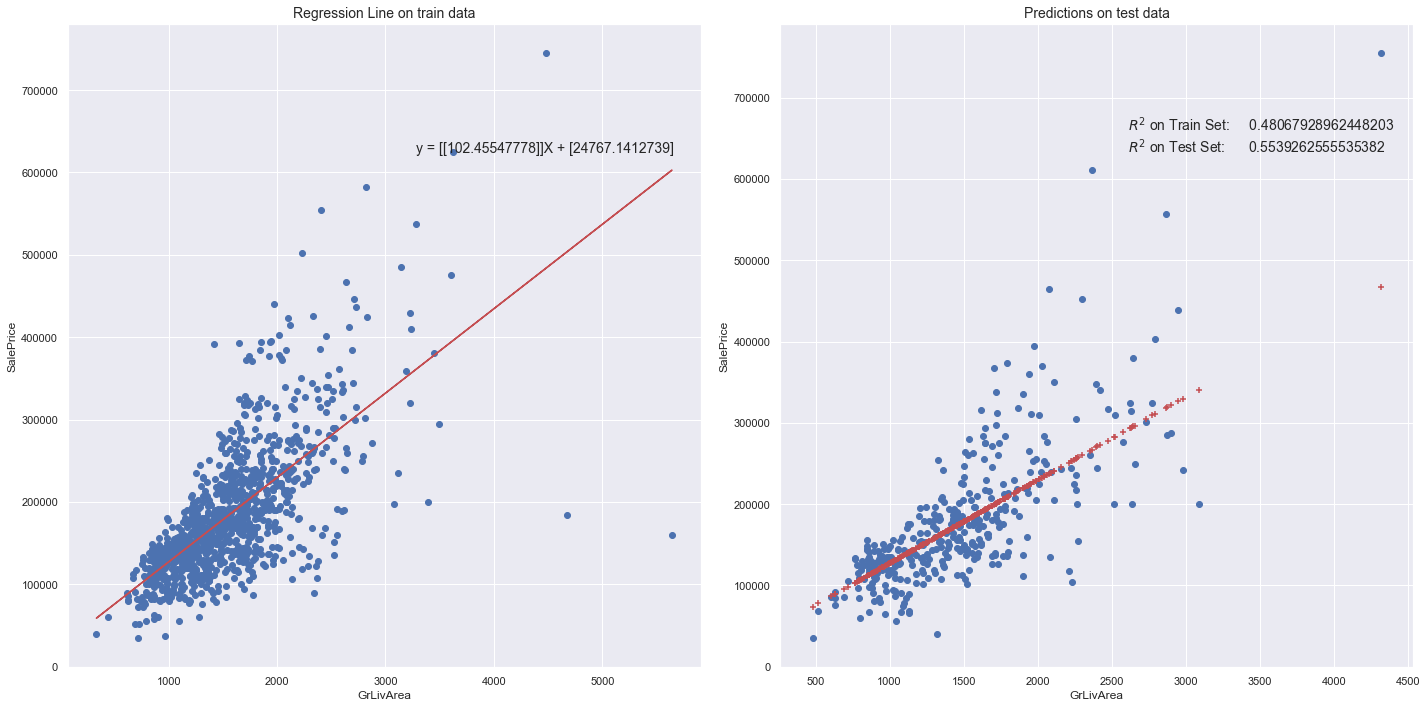

In [276]:
linear_regression('GrLivArea', 'SalePrice', houseData)